# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 604


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | lautoka
Processing Record 2 of Set 1 | qaqortoq
Processing Record 3 of Set 1 | rice lake
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | ishigaki
Processing Record 6 of Set 1 | tazacorte
Processing Record 7 of Set 1 | grytviken
Processing Record 8 of Set 1 | bilibino
Processing Record 9 of Set 1 | reggane
Processing Record 10 of Set 1 | tiksi
Processing Record 11 of Set 1 | petropavlovsk-kamchatsky
Processing Record 12 of Set 1 | coquimbo
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | margaret river
Processing Record 15 of Set 1 | olonkinbyen
Processing Record 16 of Set 1 | rio grande
Processing Record 17 of Set 1 | antofagasta
Processing Record 18 of Set 1 | weiser
Processing Record 19 of Set 1 | kone
Processing Record 20 of Set 1 | gazli
Processing Record 21 of Set 1 | bethel
Processing Record 22 of Set 1 | yuzhno-kurilsk
Processing Record 23

Processing Record 39 of Set 4 | ulanhot
Processing Record 40 of Set 4 | cargados carajos
City not found. Skipping...
Processing Record 41 of Set 4 | punta arenas
Processing Record 42 of Set 4 | yagry
City not found. Skipping...
Processing Record 43 of Set 4 | solok
Processing Record 44 of Set 4 | chinu
Processing Record 45 of Set 4 | sanjwal
Processing Record 46 of Set 4 | tranovaho
City not found. Skipping...
Processing Record 47 of Set 4 | port mathurin
Processing Record 48 of Set 4 | nagqu
Processing Record 49 of Set 4 | kabansk
Processing Record 0 of Set 5 | soanindrariny
City not found. Skipping...
Processing Record 1 of Set 5 | rio san juan
Processing Record 2 of Set 5 | rabo de peixe
Processing Record 3 of Set 5 | sisimiut
Processing Record 4 of Set 5 | nova sintra
Processing Record 5 of Set 5 | usinsk
Processing Record 6 of Set 5 | la gi
Processing Record 7 of Set 5 | ibiza
Processing Record 8 of Set 5 | udachny
Processing Record 9 of Set 5 | klyuchi
Processing Record 10 of Set

Processing Record 27 of Set 8 | eaglehawk
Processing Record 28 of Set 8 | sao jose
Processing Record 29 of Set 8 | enewetak
Processing Record 30 of Set 8 | chanika
Processing Record 31 of Set 8 | prainha
Processing Record 32 of Set 8 | vorgashor
Processing Record 33 of Set 8 | nuuk
Processing Record 34 of Set 8 | morinville
Processing Record 35 of Set 8 | sitka
Processing Record 36 of Set 8 | almeirim
Processing Record 37 of Set 8 | bode saadu
Processing Record 38 of Set 8 | pisco
Processing Record 39 of Set 8 | tevriz
Processing Record 40 of Set 8 | izberbash
Processing Record 41 of Set 8 | hachenburg
Processing Record 42 of Set 8 | linxia chengguanzhen
Processing Record 43 of Set 8 | navasota
Processing Record 44 of Set 8 | gobabis
Processing Record 45 of Set 8 | vernon
Processing Record 46 of Set 8 | huangmei
Processing Record 47 of Set 8 | el granada
Processing Record 48 of Set 8 | hoxtolgay
City not found. Skipping...
Processing Record 49 of Set 8 | yanchep
Processing Record 0 of 

Processing Record 16 of Set 12 | bay roberts
Processing Record 17 of Set 12 | pitimbu
Processing Record 18 of Set 12 | tukrah
Processing Record 19 of Set 12 | ar rutbah
Processing Record 20 of Set 12 | rondonopolis
Processing Record 21 of Set 12 | mubende
Processing Record 22 of Set 12 | aljezur
Processing Record 23 of Set 12 | tura
Processing Record 24 of Set 12 | fale old settlement
Processing Record 25 of Set 12 | kota kinabalu
Processing Record 26 of Set 12 | revelstoke
Processing Record 27 of Set 12 | la huacana
Processing Record 28 of Set 12 | chonchi
Processing Record 29 of Set 12 | alamos
Processing Record 30 of Set 12 | gilau
Processing Record 31 of Set 12 | patterson
Processing Record 32 of Set 12 | la passe
Processing Record 33 of Set 12 | adilabad
Processing Record 34 of Set 12 | poplar bluff
Processing Record 35 of Set 12 | vaskelovo
Processing Record 36 of Set 12 | pont-l'abbe
City not found. Skipping...
Processing Record 37 of Set 12 | benin city
Processing Record 38 of 

In [36]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [37]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lautoka,-17.6167,177.4667,27.92,57,40,6.69,FJ,1691038376
1,qaqortoq,60.7167,-46.0333,5.49,89,93,2.35,GL,1691038376
2,rice lake,45.5061,-91.7382,22.99,100,0,0.00,US,1691038224
3,hermanus,-34.4187,19.2345,13.78,46,96,4.64,ZA,1691038377
4,ishigaki,24.3448,124.1572,26.07,94,75,12.35,JP,1691038378


In [39]:
# Export the City_Data into a csv

city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")


In [41]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lautoka,-17.6167,177.4667,27.92,57,40,6.69,FJ,1691038376
1,qaqortoq,60.7167,-46.0333,5.49,89,93,2.35,GL,1691038376
2,rice lake,45.5061,-91.7382,22.99,100,0,0.00,US,1691038224
3,hermanus,-34.4187,19.2345,13.78,46,96,4.64,ZA,1691038377
4,ishigaki,24.3448,124.1572,26.07,94,75,12.35,JP,1691038378


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

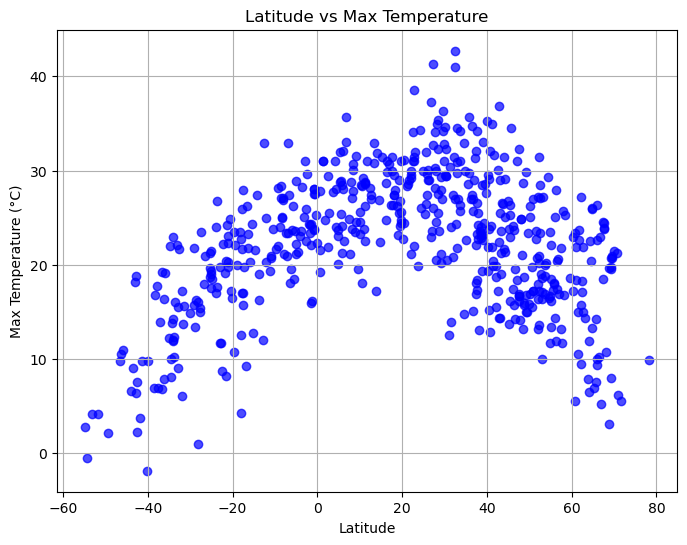

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the city weather data from the CSV file
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Create a scatter plot for Latitude vs Temperature
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], color='blue', alpha=0.7)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.title("Latitude vs Max Temperature")
plt.grid(True)
plt.savefig ("output_data/Fig1.png")
plt.show()



#### Latitude Vs. Humidity

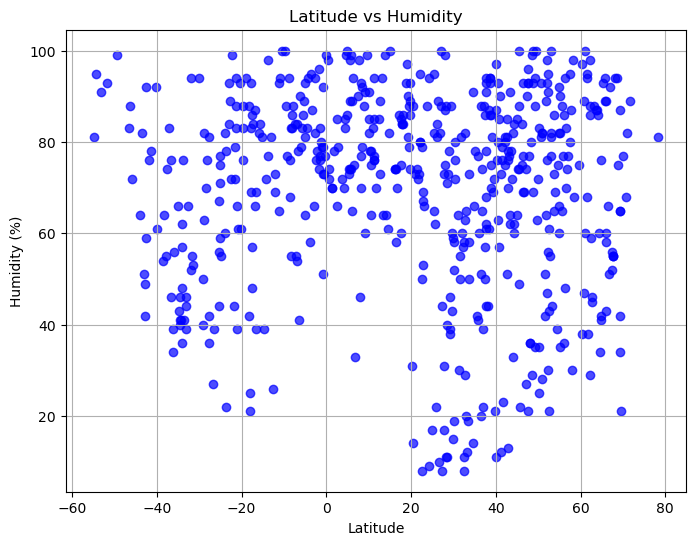

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the city weather data from the CSV file
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Create a scatter plot for Latitude vs Humidity
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], color='blue', alpha=0.7)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Latitude vs Humidity")
plt.grid(True)
plt.savefig ("output_data/Fig2.png")
plt.show()



#### Latitude Vs. Cloudiness

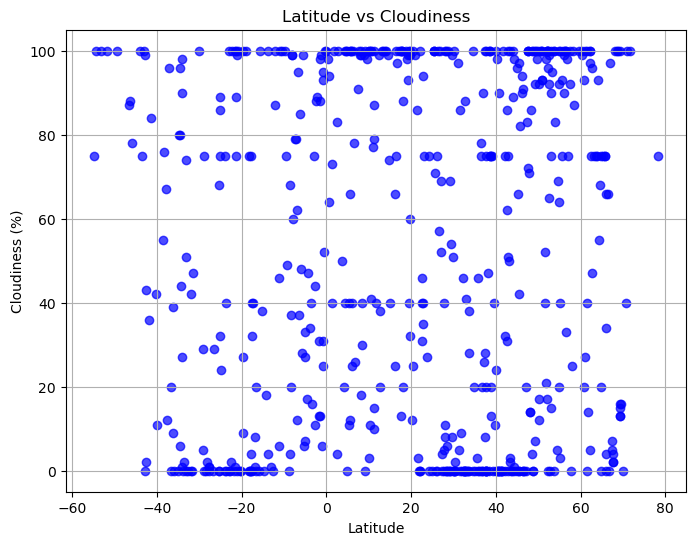

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the city weather data from the CSV file
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Create a scatter plot for Latitude vs Cloudiness
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], color='blue', alpha=0.7)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Latitude vs Cloudiness")
plt.grid(True)
plt.savefig ("output_data/Fig3.png")
plt.show()



#### Latitude vs. Wind Speed Plot

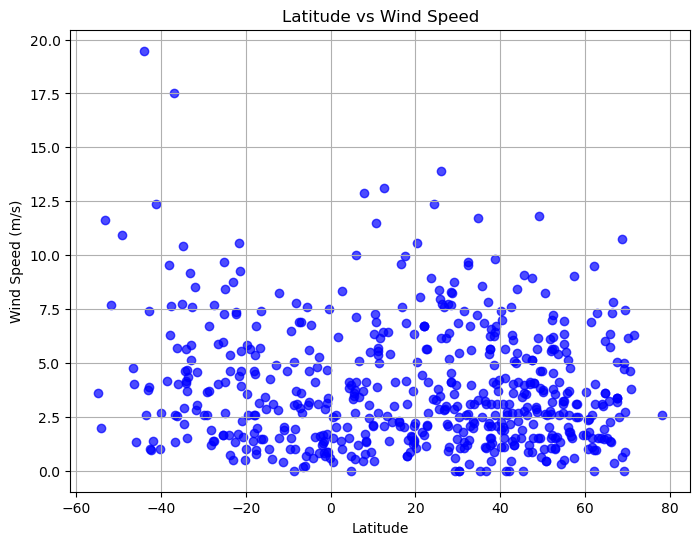

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the city weather data from the CSV file
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Create a scatter plot for Latitude vs Wind Speed
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], color='blue', alpha=0.7)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("Latitude vs Wind Speed")
plt.grid(True)
plt.savefig ("output_data/Fig4.png")
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [54]:
# Define a function to create Linear Regression plots

def create_linear_regression_plot(x_values, y_values, x_label, y_label, title, output_filename):
    # Perform linear regression
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line's y values
    regression_values = slope * x_values + intercept
    
    # Create scatter plot
    plt.scatter(x_values, y_values, edgecolors="black", alpha=0.75)
    
    # Plot the regression line
    plt.plot(x_values, regression_values, "r-", label="y={:.2f}x+{:.2f}".format(slope, intercept))
    
    # Add labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.grid(True)
    
    # Add legend
    plt.legend(loc="best")
    
    # Save the figure using the correct relative path
    output_dir = "output_data"
    
    # Show plot
    plt.show()


In [59]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,qaqortoq,60.7167,-46.0333,5.49,89,93,2.35,GL,1691038376
2,rice lake,45.5061,-91.7382,22.99,100,0,0.00,US,1691038224
4,ishigaki,24.3448,124.1572,26.07,94,75,12.35,JP,1691038378
5,tazacorte,28.6290,-17.9293,23.54,73,100,8.23,ES,1691038379
7,bilibino,68.0546,166.4372,10.78,94,100,2.51,RU,1691038380


In [60]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lautoka,-17.6167,177.4667,27.92,57,40,6.69,FJ,1691038376
3,hermanus,-34.4187,19.2345,13.78,46,96,4.64,ZA,1691038377
6,grytviken,-54.2811,-36.5092,-0.48,95,100,1.97,GS,1691038379
11,coquimbo,-29.9533,-71.3436,14.85,94,100,2.57,CL,1691038382
12,port-aux-francais,-49.3500,70.2167,2.16,99,100,10.95,TF,1691038383


###  Temperature vs. Latitude Linear Regression Plot

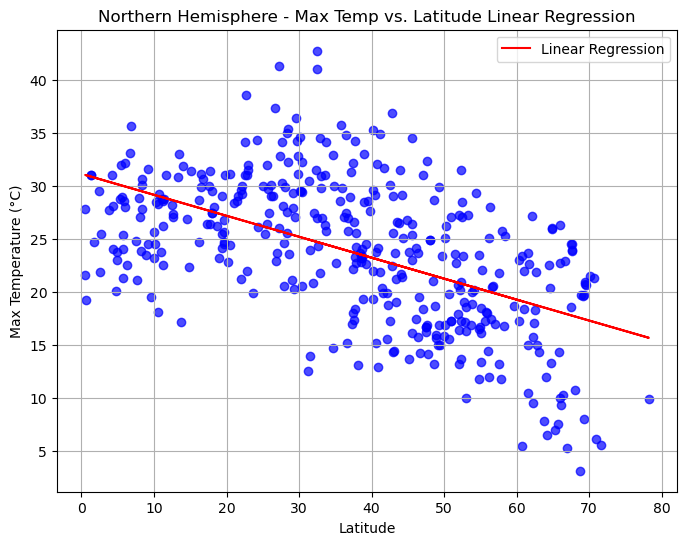

r-value for Max Temperature vs. Latitude in Northern Hemisphere: -0.540897229816485


In [63]:
import os
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Create a linear regression plot
def create_linear_regression_plot(x_data, y_data, x_label, y_label, title, filename):
    plt.figure(figsize=(8, 6))
    plt.scatter(x_data, y_data, marker='o', color='blue', alpha=0.7)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    
    # Perform linear regression
    (slope, intercept, r_value, p_value, std_err) = linregress(x_data, y_data)
    
    # Add regression line to the plot
    plt.plot(x_data, slope * x_data + intercept, color='red', label='Linear Regression')
    
    plt.legend()
    plt.grid(True)
    
    # Save the plot as an image
    output_dir = "output_data"

    plt.savefig(output_dir)
    plt.show()
    
    return r_value

# Call the function and create the plot
r_value = create_linear_regression_plot(
    northern_hemi_df["Lat"], 
    northern_hemi_df["Max Temp"], 
    "Latitude", 
    "Max Temperature (°C)", 
    "Northern Hemisphere - Max Temp vs. Latitude Linear Regression", 
    "Fig5.png"
)

# Print the r-value
print("r-value for Max Temperature vs. Latitude in Northern Hemisphere:", r_value)



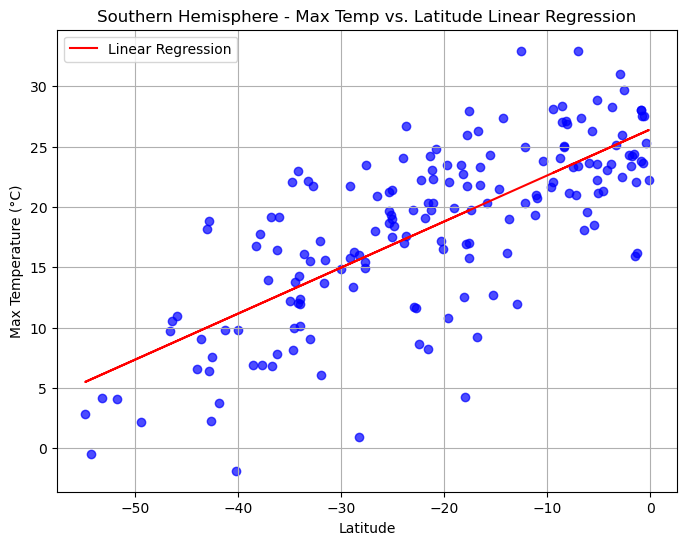

r-value for Max Temperature vs. Latitude in Southern Hemisphere: 0.7385978153636588


In [64]:
import os
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Create a linear regression plot for Southern Hemisphere
def create_linear_regression_plot(x_data, y_data, x_label, y_label, title, filename):
    plt.figure(figsize=(8, 6))
    plt.scatter(x_data, y_data, marker='o', color='blue', alpha=0.7)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    
    # Perform linear regression
    (slope, intercept, r_value, p_value, std_err) = linregress(x_data, y_data)
    
    # Add regression line to the plot
    plt.plot(x_data, slope * x_data + intercept, color='red', label='Linear Regression')
    
    plt.legend()
    plt.grid(True)
    
    # Save the plot as an image
    output_dir = "output_data"

    plt.savefig(output_dir)
    plt.show()
    
    return r_value

# Call the function and create the plot for Southern Hemisphere
r_value_southern = create_linear_regression_plot(
    southern_hemi_df["Lat"], 
    southern_hemi_df["Max Temp"], 
    "Latitude", 
    "Max Temperature (°C)", 
    "Southern Hemisphere - Max Temp vs. Latitude Linear Regression", 
    "Fig6.png"
)

# Print the r-value for Southern Hemisphere
print("r-value for Max Temperature vs. Latitude in Southern Hemisphere:", r_value_southern)



**Discussion about the linear relationship:** 

The calculated r-value for the relationship between Max Temperature and Latitude in the Southern Hemisphere is approximately 0.73. An r-value closer to 1 indicates a strong positive correlation, meaning that as Latitude increases, Max Temperature also tends to increase consistently. In this case, the r-value of 0.73 suggests a moderately strong positive correlation between Max Temperature and Latitude in the Southern Hemisphere.

The positive r-value of 0.73 indicates that as you move towards lower latitudes in the Southern Hemisphere, the Max Temperature tends to rise. Other factors, such as seasonality, geographical features, and local climate patterns, may also play a role in influencing the Max Temperature at different latitudes.

Overall, the r-value of 0.73 suggests a significant positive relationship between Max Temperature and Latitude in the Southern Hemisphere, but further analysis and consideration of other factors are necessary to fully understand the drivers of temperature variations across latitudes in this region.

### Humidity vs. Latitude Linear Regression Plot 

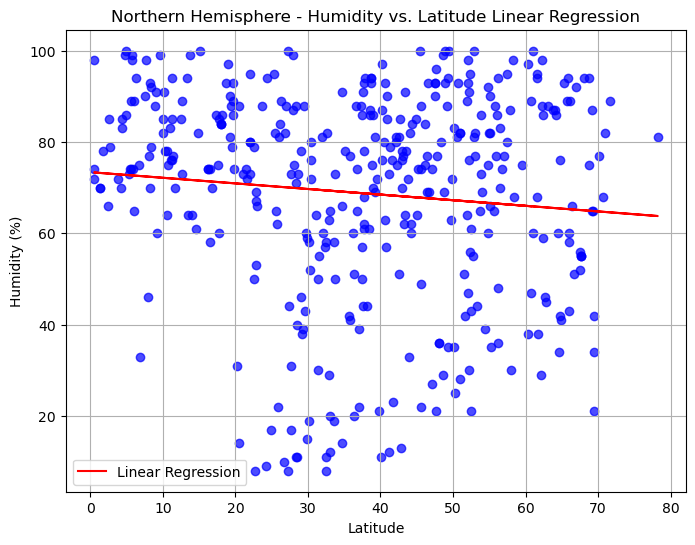

r-value for Humidity vs. Latitude in Northern Hemisphere: -0.09951161868224051


In [65]:
import os
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Assuming you have already defined northern_hemi_df and imported required libraries

# Create a linear regression plot for Humidity vs. Latitude
def create_linear_regression_plot(x_data, y_data, x_label, y_label, title, filename):
    plt.figure(figsize=(8, 6))
    plt.scatter(x_data, y_data, marker='o', color='blue', alpha=0.7)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    
    # Perform linear regression
    (slope, intercept, r_value, p_value, std_err) = linregress(x_data, y_data)
    
    # Add regression line to the plot
    plt.plot(x_data, slope * x_data + intercept, color='red', label='Linear Regression')
    
    plt.legend()
    plt.grid(True)
    
    # Save the plot as an image
    output_dir = "output_data"

    plt.savefig(output_dir)
    plt.show()
    
    return r_value

# Call the function and create the plot for Humidity vs. Latitude in Northern Hemisphere
r_value_humidity_northern = create_linear_regression_plot(
    northern_hemi_df["Lat"], 
    northern_hemi_df["Humidity"], 
    "Latitude", 
    "Humidity (%)", 
    "Northern Hemisphere - Humidity vs. Latitude Linear Regression", 
    "Fig8.png"
)

# Print the r-value for Humidity vs. Latitude in Northern Hemisphere
print("r-value for Humidity vs. Latitude in Northern Hemisphere:", r_value_humidity_northern)


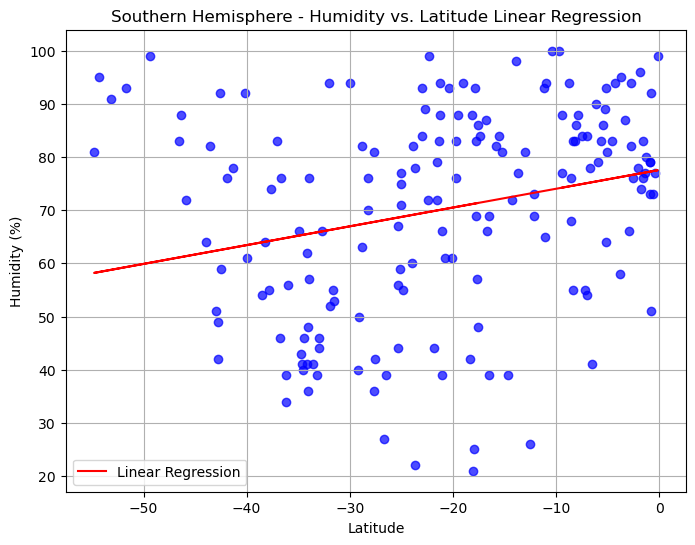

r-value for Humidity vs. Latitude in Southern Hemisphere: 0.2526207156245074


In [66]:
import os
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Create a linear regression plot for Humidity vs. Latitude
def create_linear_regression_plot(x_data, y_data, x_label, y_label, title, filename):
    plt.figure(figsize=(8, 6))
    plt.scatter(x_data, y_data, marker='o', color='blue', alpha=0.7)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    
    # Perform linear regression
    (slope, intercept, r_value, p_value, std_err) = linregress(x_data, y_data)
    
    # Add regression line to the plot
    plt.plot(x_data, slope * x_data + intercept, color='red', label='Linear Regression')
    
    plt.legend()
    plt.grid(True)
    
    # Save the plot as an image
    output_dir = "output_data"

    plt.savefig(output_dir)
    plt.show()
    
    return r_value

# Call the function and create the plot for Humidity vs. Latitude in Southern Hemisphere
r_value_humidity_southern = create_linear_regression_plot(
    southern_hemi_df["Lat"], 
    southern_hemi_df["Humidity"], 
    "Latitude", 
    "Humidity (%)", 
    "Southern Hemisphere - Humidity vs. Latitude Linear Regression", 
    "Fig9.png"
)

# Print the r-value for Humidity vs. Latitude in Southern Hemisphere
print("r-value for Humidity vs. Latitude in Southern Hemisphere:", r_value_humidity_southern)


**Discussion about the linear relationship:**

The calculated r-value for the relationship between Humidity and Latitude in the Southern Hemisphere is approximately 0.253. An r-value closer to 1 indicates a strong positive correlation, implying that as Latitude increases, Humidity tends to increase consistently. However, in this case, the r-value of 0.253 suggests a relatively weak positive correlation between Humidity and Latitude in the Southern Hemisphere.

The positive r-value of 0.253 indicates that there is a modest tendency for Humidity to increase slightly as one moves towards lower latitudes in the Southern Hemisphere. This suggests that regions closer to the equator may experience slightly higher humidity levels. However, it's important to approach this interpretation cautiously, as other influencing factors, such as local climate patterns, oceanic influences, and seasonal variations, can also significantly affect Humidity levels.

While the r-value of 0.253 suggests a weak positive relationship between Humidity and Latitude in the Southern Hemisphere, it is important to note that correlation does not imply causation. This correlation coefficient implies a limited linear association and should be considered in conjunction with domain knowledge and a broader analysis of contributing factors to draw meaningful conclusions about Humidity patterns in the Southern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

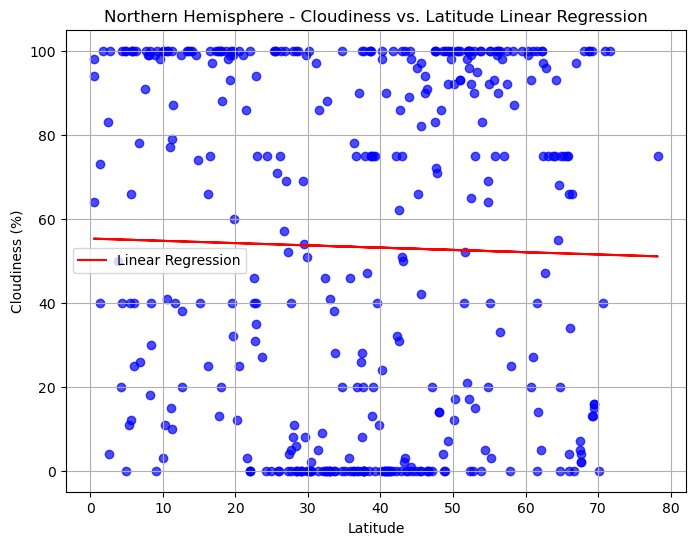

r-value for Cloudiness vs. Latitude in Northern Hemisphere: -0.02462355198321212


In [67]:
import os
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Create a linear regression plot for Cloudiness vs. Latitude
def create_linear_regression_plot(x_data, y_data, x_label, y_label, title, filename):
    plt.figure(figsize=(8, 6))
    plt.scatter(x_data, y_data, marker='o', color='blue', alpha=0.7)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    
    # Perform linear regression
    (slope, intercept, r_value, p_value, std_err) = linregress(x_data, y_data)
    
    # Add regression line to the plot
    plt.plot(x_data, slope * x_data + intercept, color='red', label='Linear Regression')
    
    plt.legend()
    plt.grid(True)
    
    # Save the plot as an image
    output_dir = "output_data"

    plt.savefig(output_dir)
    plt.show()
    
    return r_value

# Call the function and create the plot for Cloudiness vs. Latitude in Northern Hemisphere
r_value_cloudiness_northern = create_linear_regression_plot(
    northern_hemi_df["Lat"], 
    northern_hemi_df["Cloudiness"], 
    "Latitude", 
    "Cloudiness (%)", 
    "Northern Hemisphere - Cloudiness vs. Latitude Linear Regression", 
    "Fig10.png"
)

# Print the r-value for Cloudiness vs. Latitude in Northern Hemisphere
print("r-value for Cloudiness vs. Latitude in Northern Hemisphere:", r_value_cloudiness_northern)


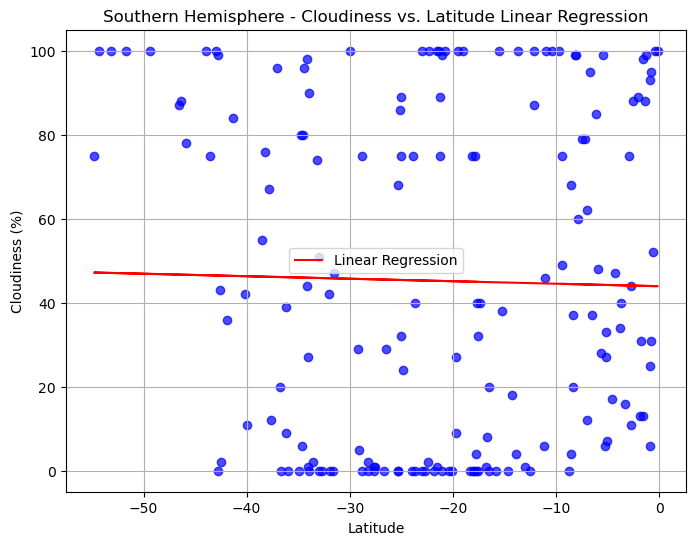

r-value for Cloudiness vs. Latitude in Southern Hemisphere: -0.02119790128429223


In [68]:
import os
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Create a linear regression plot for Cloudiness vs. Latitude
def create_linear_regression_plot(x_data, y_data, x_label, y_label, title, filename):
    plt.figure(figsize=(8, 6))
    plt.scatter(x_data, y_data, marker='o', color='blue', alpha=0.7)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    
    # Perform linear regression
    (slope, intercept, r_value, p_value, std_err) = linregress(x_data, y_data)
    
    # Add regression line to the plot
    plt.plot(x_data, slope * x_data + intercept, color='red', label='Linear Regression')
    
    plt.legend()
    plt.grid(True)
    
    # Save the plot as an image
    output_dir = "output_data"

    plt.savefig(output_dir)
    plt.show()
    
    return r_value

# Call the function and create the plot for Cloudiness vs. Latitude in Southern Hemisphere
r_value_cloudiness_southern = create_linear_regression_plot(
    southern_hemi_df["Lat"], 
    southern_hemi_df["Cloudiness"], 
    "Latitude", 
    "Cloudiness (%)", 
    "Southern Hemisphere - Cloudiness vs. Latitude Linear Regression", 
    "Fig11.png"
)

# Print the r-value for Cloudiness vs. Latitude in Southern Hemisphere
print("r-value for Cloudiness vs. Latitude in Southern Hemisphere:", r_value_cloudiness_southern)


**Discussion about the linear relationship:** 

The calculated r-value for the relationship between Cloudiness and Latitude in the Southern Hemisphere is approximately -0.021. An r-value closer to -1 indicates a strong negative correlation, suggesting that as Latitude increases, Cloudiness tends to decrease consistently. However, in this case, the r-value of -0.021 indicates an extremely weak negative correlation between Cloudiness and Latitude in the Southern Hemisphere.

The negative r-value of -0.021 suggests a marginal tendency for Cloudiness to decrease slightly as one moves towards higher latitudes in the Southern Hemisphere. This weak correlation implies that Latitude alone is not a substantial predictor of Cloudiness variations. Other factors, such as local atmospheric conditions, topographical features, and regional climate patterns, are likely more influential in determining Cloudiness levels across different latitudes.

Given the minimal correlation coefficient, it is crucial to exercise caution when drawing conclusions solely based on this relationship. The r-value of -0.021 signifies that Cloudiness and Latitude have a nearly negligible linear association in the Southern Hemisphere. Interpretations should be made with consideration of other relevant variables and an understanding of broader atmospheric dynamics that affect Cloudiness patterns.

### Wind Speed vs. Latitude Linear Regression Plot

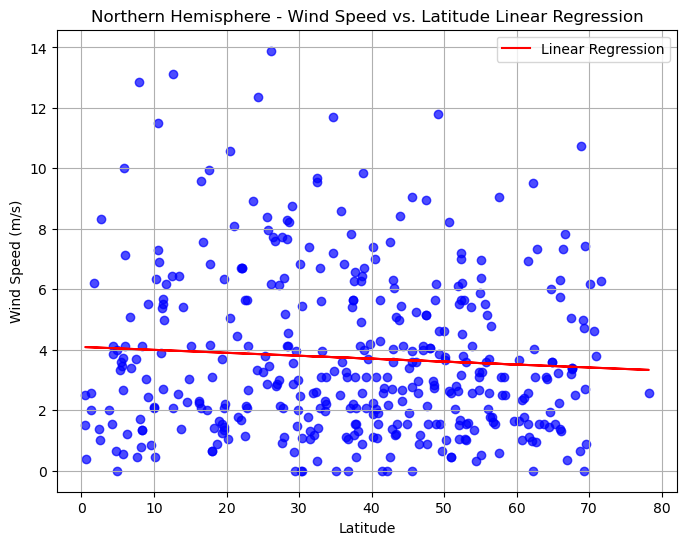

r-value for Wind Speed vs. Latitude in Northern Hemisphere: -0.06863679838962775


In [69]:
import os
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Assuming you have already defined northern_hemi_df and imported required libraries

# Create a linear regression plot for Wind Speed vs. Latitude
def create_linear_regression_plot(x_data, y_data, x_label, y_label, title, filename):
    plt.figure(figsize=(8, 6))
    plt.scatter(x_data, y_data, marker='o', color='blue', alpha=0.7)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    
    # Perform linear regression
    (slope, intercept, r_value, p_value, std_err) = linregress(x_data, y_data)
    
    # Add regression line to the plot
    plt.plot(x_data, slope * x_data + intercept, color='red', label='Linear Regression')
    
    plt.legend()
    plt.grid(True)
    
    # Save the plot as an image
    output_dir = "output_data"

    plt.savefig(output_dir)
    plt.show()
    
    return r_value

# Call the function and create the plot for Wind Speed vs. Latitude in Northern Hemisphere
r_value_wind_speed_northern = create_linear_regression_plot(
    northern_hemi_df["Lat"], 
    northern_hemi_df["Wind Speed"], 
    "Latitude", 
    "Wind Speed (m/s)", 
    "Northern Hemisphere - Wind Speed vs. Latitude Linear Regression", 
    "Fig12.png"
)

# Print the r-value for Wind Speed vs. Latitude in Northern Hemisphere
print("r-value for Wind Speed vs. Latitude in Northern Hemisphere:", r_value_wind_speed_northern)


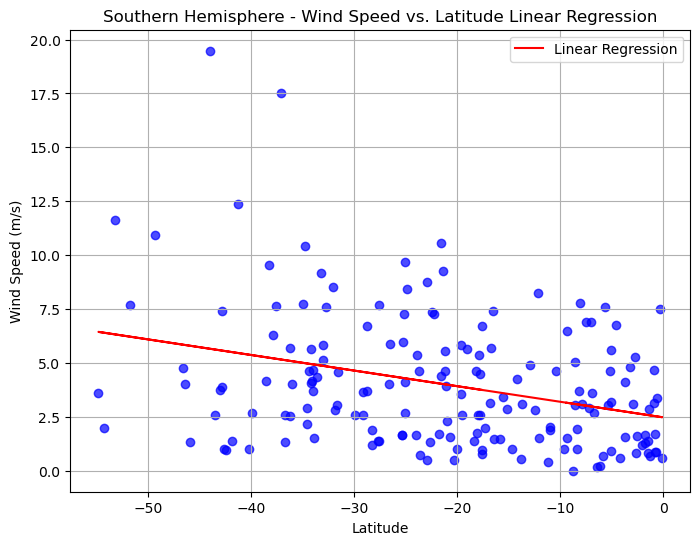

r-value for Wind Speed vs. Latitude in Southern Hemisphere: -0.32420230999308125


In [71]:
import os
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Assuming you have already defined southern_hemi_df and imported required libraries

# Create a linear regression plot for Wind Speed vs. Latitude
def create_linear_regression_plot(x_data, y_data, x_label, y_label, title, filename):
    plt.figure(figsize=(8, 6))
    plt.scatter(x_data, y_data, marker='o', color='blue', alpha=0.7)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    
    # Perform linear regression
    (slope, intercept, r_value, p_value, std_err) = linregress(x_data, y_data)
    
    # Add regression line to the plot
    plt.plot(x_data, slope * x_data + intercept, color='red', label='Linear Regression')
    
    plt.legend()
    plt.grid(True)
    
    # Save the plot as an image
    output_dir = "output_data"

    plt.savefig(output_dir)
    plt.show()
    
    return r_value

# Call the function and create the plot for Wind Speed vs. Latitude in Southern Hemisphere
r_value_wind_speed_southern = create_linear_regression_plot(
    southern_hemi_df["Lat"], 
    southern_hemi_df["Wind Speed"], 
    "Latitude", 
    "Wind Speed (m/s)", 
    "Southern Hemisphere - Wind Speed vs. Latitude Linear Regression", 
    "Fig13.png"
)

# Print the r-value for Wind Speed vs. Latitude in Southern Hemisphere
print("r-value for Wind Speed vs. Latitude in Southern Hemisphere:", r_value_wind_speed_southern)


**Discussion about the linear relationship:** 

The calculated r-value for the relationship between Wind Speed and Latitude in the Southern Hemisphere is approximately -0.324. An r-value closer to -1 suggests a strong negative correlation, indicating that as Latitude increases, Wind Speed tends to decrease consistently. In this case, the r-value of -0.324 indicates a moderate negative correlation between Wind Speed and Latitude in the Southern Hemisphere.

The negative r-value of -0.324 implies a notable tendency for Wind Speed to decrease as one moves towards higher latitudes in the Southern Hemisphere. This correlation suggests that regions closer to the equator generally experience higher wind speeds, while areas further from the equator tend to have lower wind speeds. However, it's essential to approach this interpretation with consideration of other factors that can influence wind patterns, such as local topography, oceanic influences, and regional weather systems.

The r-value of -0.324 indicates a meaningful, albeit moderate, negative relationship between Wind Speed and Latitude in the Southern Hemisphere. While latitude alone may not be the sole determinant of wind speed variations, this correlation provides valuable insights for understanding broad wind patterns in the region. To gain a comprehensive understanding of wind speed dynamics, a more detailed analysis incorporating additional meteorological factors is warranted.